In [1]:
using LinearAlgebra, RowEchelon, LaTeXStrings, Plots, SymPy, LAcode
##] dev --local "."

<div style="float:center;width:100%;text-align: center;"><strong style="height:100px;color:darkred;font-size:40px;">The Singular Value Decomposition</strong></div>

# 1. Motivation

## 1.1 Generalize the Idea of an Eigendecomposition

The Eigendecomposition of a matrix $A$ has shortcomings: 
* A square matrix $A$ may or may not have a **complete eigenvector basis**
* There is no eigendecomposition for **matrices that are not square.**

> The case $A$ of size $M \times N$ with $M \ne N$ shows a restiction<br> we had imposed to find the eigendecomposition:<br>
$\quad\quad$ **we used the same basis vectors** $s_1, s_2, \dots s_n$ in both the domain and the codomain of $y = A x$.


<div style="float:left;width:57%;border:1px solid black;padding-left:0.3cm;">

**Idea:** use different bases for $y = A x.$<br><br>
$\left. \begin{align}
x &= V \tilde{x} \\
    y &= U \tilde{y}
\end{align}\right\}\quad \Rightarrow \quad U \tilde{y} = A V \tilde{x}
\quad \Rightarrow \quad \tilde{y} = U^{-1} A V \tilde{x} = \Sigma \tilde{x},
$

$\quad$ where we have set $\Sigma = U^{-1} A V \Leftrightarrow A = U \Sigma V^{-1}.$
</div>
<div style="float:right;border:1px solid black;width:40%;height:3.6cm;">
$\;$ Better yet, let us try for orthonormal bases:

$$
U^{-1} = U^t, \; \text{ and }\; V^{-1} = V^t.
$$

$\;$**Remark: the matrix sizes are**<br>
$\quad\quad A_{M\times N}, \Sigma_{M\times N}, V_{N \times N}, U_{M \times M}$. 
</div>

> What should $\Sigma$ look like? We would like a diagonal matrix, but $\Sigma$ is not square in general.
Let us try for
$$
\Sigma = \begin{pmatrix} \Sigma_r & 0 \\ 0 & 0 \end{pmatrix},
$$
where $\Sigma_r$ is a square diagonal matrix of size $r \times r$ with $r$ non-zero entries on the diagonal,<br>
and zero entries to fill out the remaining entries in a matrix of size $M \times N$.

> **Examples:**
>
> $\quad\quad
\left( \begin{array}{cc|c} \color{red}5 & \color{red}0 & 0 \\ \color{red}0 & \color{red}1 & 0 \\ \hline 0 & 0 & 0 \end{array}\right),\quad
\left( \begin{array}{cc|c} \color{red}5 & \color{red}0 & 0 \\ \color{red}0 & \color{red}1 & 0\end{array}\right), \quad
\left( \begin{array}{cc} \color{red}5 & \color{red}0 \\ \color{red}0 & \color{red}1 \\ \hline 0 & 0 \end{array}\right),\quad
$
where the $\color{red}{\Sigma_r}$ entries are shown in red.

## 1.2 Is this Feasible?

<div style="float:left;with:15cm;">

Consider $A = U \Sigma V^t.$<br>
We can manipulate this equation in various ways:

$$\begin{align}
A = U \Sigma V^t & \quad \Leftrightarrow \quad &  A V & = \Sigma U \label{eqn1}\tag{1} \\
A = U \Sigma V^t & \quad \Rightarrow \quad  & A^t A & = V \Sigma^t \Sigma V^t \label{eqn2}\tag{2} \\
A = U \Sigma V^t & \quad \Rightarrow \quad  & A A^t & = U \Sigma \Sigma^t U^t \label{eqn3}\tag{3} \\
\end{align}
$$
</div>

#### **Remarks:**

* $\Sigma^t \Sigma = \begin{pmatrix} \Sigma_r^2 & 0 \\ 0 & 0 \end{pmatrix}$ is a diagonal matrix of size $N \times N.$
* $\Sigma \Sigma^t = \begin{pmatrix} \Sigma_r^2 & 0 \\ 0 & 0 \end{pmatrix}$ is a diagonal matrix of size $M \times M.$

* Eqn 2:  $\;A^tA = V ( \Sigma^t \Sigma) V^t \quad$ is an orthogonal eigendecomposition  of the symmetric matrix $A^t A.$<br>
$\quad\quad$  An orthogonal matrix $V$ and a diagonal matrix $\Sigma^t \Sigma$ do exist
* Eqn 3:  $\;AA^t = U ( \Sigma \Sigma^t) U^t \quad$ is an orthogonal eigendecomposition  of the symmetric matrix $A A^t.$<br>
$\quad\quad$  An orthogonal matrix $U$ and a diagonal matrix $\Sigma \Sigma^t$ do exist

<strong>These are the orthogonal eigendecompositions of the Gram Matrices!</strong>

* The eigenvalues $\lambda$ of the Gram matrices are real (the matrices are symmetric),<br>
    and non-negative: we can **choose** the diagonal entries in $\Sigma_r$ to be the positive square roots $\sigma = \sqrt{\lambda}$<br><br>
    Let us arrange them in decreasing order, i.e.,<br><br>$\quad$
    $\Sigma_r = \begin{pmatrix} \color{red}{\sigma_1} & 0 & \dots & 0\\
                                    0 & \color{red}{\sigma_2} & \dots & 0\\
                                    \dots & \dots & \dots & \dots \\
                                    0 & 0 & \dots & \color{red}{\sigma_r} \end{pmatrix}\quad$
with $\quad \sigma_1 \ge \sigma_2 \ge \dots \ge \sigma_r > 0.$

* Eqn 1: $\; A V = U \Sigma \quad$ further posits a relationship between $U$ and $V$ that the Gram Matrices do satisfy.<br>
$\quad$ **The ordering of the columns of $U$ and $V$ needs to be consistent.**

###### **Remarks:**

$\quad$
Let $rank(A) = r$, and let $V_r$ and $U_r$ be the first $r$ columns of $V$ and $U$ repectively.<br><br>$\quad$
* Since $A V = U \Sigma \Leftrightarrow A \left( V_r \tilde{V}_r \right) = 
\left( U_r \tilde{U}_r \right) \begin{pmatrix} \Sigma_r & 0 \\ 0 & 0 \end{pmatrix} \quad \Leftrightarrow \quad
\left\{ \begin{align}
A V_r =&\ U_r \Sigma_r  \Leftrightarrow u_i = \frac{1}{\sigma_i} A v_i,\;\; i=1,2,\dots r \\
A \tilde{V}_r =&\ 0
\end{align} \right.
$<br><br>$\qquad$
the ordering requirement only applies to $U_r$ and $V_r$.

## 1.3 The Reduced Singular Value Decomposition

We have $
\quad\quad A = \begin{pmatrix} U_r & \tilde{U}_r \end{pmatrix}
    \begin{pmatrix} \Sigma_r & 0 \\ 0 & 0 \end{pmatrix}
    \begin{pmatrix} V_r & \tilde{V}_r \end{pmatrix}^t
  = \color{red}{U_r\ \Sigma_r\ V_r^t}.
$

$\qquad$ **The null space basis vectors have no effect on this decomposition!**

$\qquad$ $A = U_r \Sigma_r V^t_r$ is known as the **reduced singular value decomposition** or the **compact singular value decomposition**

#### **Remarks:**

* **Advantage:**    $\;\;\;$ we only need to compute the eigenvectors of the Gram matrices for non-zero eigenvalues
* **Disadvantage:** $\;U_r$ and $V_r$ are not square in general, i.e., not invertible<br>
$\qquad\qquad\quad\;$ Regardless, the matrices are orthogonal: $V^t_r V_r = I$ and $U^t_r U_r = I$.

# 2. The Singular Value Decomposition  (SVD)

## 2.1 SVD Existence Theorem

<div style="background-color:#F2F5A9;">

**Definition:** Given a matrix $A \in \mathbb{R}^{M \times N}$.<br>
    $\quad\quad$ $A = U \Sigma V^t$ is a **singular value decomposition** of $A$ iff<br>
    $\quad\quad$ $U$ and $V$ are orthogonal matrices, and $\Sigma = \begin{pmatrix} \Sigma_r & 0 \\ 0 & 0 \end{pmatrix}$,<br>
    $\quad\quad$ where $\Sigma_r$ is a diagonal matrix of size $r\times r$, with diagonal entries $\sigma_1 \ge \sigma_2 \dots \ge \sigma_r >0.$
    
$\quad\quad$ The $\sigma_i$ are **singular values** of $A.$<br>
$\quad\quad$ The columns of $V$ are **right singular vectors** of $A.$<br>
$\quad\quad$ The columns of $U$ are **left singular vectors** of $A.$
    
</div>

<div style="background-color:#F2F5A9;">

**Theorem:** Every matrix $A \in \mathbb{R}^{M \times N}$ has a **singular value decomposition** such that<br>
    $\quad\quad$ $A = U \Sigma V^t  = U_r \Sigma_r V_r^t$
<div style="background-color:#F2F5A9;margin:30px;">

* $\Sigma = \begin{pmatrix} \Sigma_r & 0 \\ 0 & 0 \end{pmatrix}$,
    where $\Sigma_r$ is a diagonal matrix of size $r\times r$, with non-negative diagonal entries $\sigma_1 \ge \sigma_2 \dots \ge \sigma_r >0.$
* $r = rank(A)$
* $V = \begin{pmatrix} V_r & \tilde{V}_r \end{pmatrix}$
    * the $r$ columns of $V_r$ form an orthonormal basis for $\mathscr{R}(A)$
    * the $N-r$ columns of $\tilde{V}_r$ form an orthonormal basis for $\mathscr{N}(A)$
* $U = \begin{pmatrix} U_r & \tilde{U}_r \end{pmatrix}$
    * the $r$ columns of $V_r$ form an orthonormal basis for $\mathscr{C}(A)$
    * the $M-r$ columns of $\tilde{V}_r$ form an orthonormal basis for $\mathscr{N}(A^t)$
<br><br>
</div></div>

## 2.2 SVD Computation

The derivation shows one way of computing the SVD:
* Start with either $A^t A$ (size $N \times N$, or $A A^t$ (size $M \times M$).<br>
  We typically choose the smaller matrix.<br>

<div style="margin:30px;border:1px solid black;">

* **Compute the orthogonal eigendecomposition of $A^t A.$**<br>
  $\;\;$ this results in $\Sigma_r$, $V_r$<br>
  $\;\;$ and (optionally) an orthogonal basis for $\mathscr{N}(A)$.
  * If the full SVD is required, <br>
    we need to compute an orthogonal basis for $\mathscr{N}(A),$<br>
    and obtain $\Sigma$ by augmenting $\Sigma_r$ with zeros to the same size as $A.$
* **Compute $U_r = A V_r \Sigma_r^{-1} \Leftrightarrow u_i = \frac{1}{\sigma_i} A v_i$**
* If the full SVD is required, **compute an orthogonal basis** $\tilde{v}_i, i=1,2, \dots M-r$<br>
    $\;\;$ for $\mathscr{N}(A^t) = \mathscr{N}(A A^t) = span\{u_1, u_2, \dots u_r \}^\perp.$
</div>

#### **Example**

Let $A = \begin{pmatrix}  -3 & -1 & -1 \\
-3 & -1 & -1 \\
1 & 3 & -1 \\
-1 & -3 & 1
 \end{pmatrix}$

##### **Step 1: Orthonormal Eigendecomposition of $A^t A$**

**Eigenvalues:**

> $A^t A = \begin{pmatrix} 20 & 12 & 4 \\
12 & 20 & -4 \\
4 & -4 & 4
\end{pmatrix}$ has characteristic polynomial
$p(\lambda) = - \lambda ( \lambda^2 + 44 \lambda -384 )$
>
> $\therefore \lambda  = 32, 12,0$.



**Eigenvector Basis**

> Bases for the null spaces $\mathscr{N}(A^t A- \lambda I)$ are shown in the table below.<br>
**Caveat:** the eigenvalues must be entered in decreasing order<br>
**Caveat:** remember to use QR on the bases for each eigenspace

<div style="float:left;margin:30px;width:58%;border:1px solid black;">
<table border="1" cellpadding="0" cellspacing="0" style="border-collapse: collapse" width="300px">
<tr>
    <td height="19" width="100px">$\color{blue}{\sigma=\sqrt{\lambda}}$</td>
    <td height="19" width="100px">$4 \sqrt{2}$</td>
    <td height="19" width="100px">$2 \sqrt{3}$</td>
    <td height="19" width="100px">$\quad\quad 0$</td>
</tr>
<tr>
    <td height="19" width="100px">$\color{blue}\lambda$</td>
    <td height="19" width="100px">$32$</td>
    <td height="19" width="100px">$12$</td>
    <td height="19" width="100px">$\quad\quad 0$</td>
</tr>
<tr>
    <td height="16" width="100px" ><span  style="color:blue;">(m)</span></td>
    <td height="16" width="100px"><span  style="justify:right;">$\quad$ (1)</span></td>
    <td height="16" width="100px">$\quad$ (1)</td>
    <td height="16" width="100px">$\quad\;$ (1)</td>
</tr>
<tr>
    <td height="19" width="100px"><span  style="color:blue;">Basis for $E_\lambda$</span></td>
    <td height="19" width="100px">$\;\begin{pmatrix} 1 \\ 1 \\ 0 \end{pmatrix}\;$</td>
    <td height="19" width="100px">$\;\begin{pmatrix} -1 \\ 1 \\ -1 \end{pmatrix}\;$</td>
    <td height="19" width="100px">$\quad\;\begin{pmatrix} -1 \\ 1 \\ 2 \end{pmatrix}\;$</td>
</tr>
<tr>
    <td height="19" width="100px"><span  style="color:blue;">Orthonormal Basis for $E_\lambda$</span></td>
    <td height="19" width="100px">$\;\begin{pmatrix} \frac{\sqrt{2}}{2} \\ \frac{\sqrt{2}}{2} \\ 0 \end{pmatrix}\;$</td>
    <td height="19" width="100px">$\;\begin{pmatrix} -\frac{\sqrt{3}}{3} \\ \frac{\sqrt{3}}{3} \\ -\frac{\sqrt{3}}{3} \end{pmatrix}\;$</td>
    <td height="19" width="100px">$\quad\;\begin{pmatrix} -\frac{\sqrt{6}}{6} \\ \frac{\sqrt{6}}{3} \\ 0 \end{pmatrix}\;$</td>
</tr>
</table>
</div><div style="float:left;width:30%;margin-top:1cm;">
Therefore $\quad \color{red}{rank(A) = 2}$<br><br>

$V = \frac{1}{6} \left( \begin{array}{cc|c} 3 \sqrt{2} &  2 \sqrt{3} &\sqrt{6}\\
                                            3 \sqrt{2} & -2 \sqrt{3} & -\sqrt{6} \\
                                            0          & 2 \sqrt{3} & -2 \sqrt{6} \end{array} \right)$

$\Sigma = \left(  \begin{array}{cc|c} \color{red}{4 \sqrt{2}} & 0 & 0\\
                                      0 & \color{red}{2 \sqrt{3}} & 0\\ \hline
                                      0 & 0 & 0 \\
                                      0 & 0 & 0
\end{array}\right)$
</div>

##### **Step 2: $U_r$**

$U_r\ =\ A\ V_r\ \Sigma_r^{-1}\ =\ \frac{1}{2} \left( \begin{array}{rr} -1 & -1 \\
-1 & -1 \\
1 & -1 \\
-1 & 1
\end{array} \right)$

##### **Verify the Compact SVD**


$$A = U_r \Sigma_r V_r^t = \frac{1}{2} \left( \begin{array}{rr} -1 & -1 \\
-1 & -1 \\
1 & -1 \\
-1 & 1
\end{array}\right) \quad \left( \begin{array}{rr}
4 \, \sqrt{2} & 0 \\
0 & 2 \, \sqrt{3}
\end{array}\right)\quad \frac{1}{6} \left(\begin{array}{rr}
3 \, \sqrt{2} & 2 \, \sqrt{3} \\
3 \, \sqrt{2} & -2 \, \sqrt{3} \\
0 & 2 \, \sqrt{3}
\end{array}^t\right) \quad = \;\; \left(\begin{array}{rrr}
-3 & -1 & -1 \\
-3 & -1 & -1 \\
1 & 3 & -1 \\
-1 & -3 & 1
\end{array}\right)
$$

##### **Step 3: Obtain Ũ_r and Complete U for the Full SVD**

The columns of $\tilde{U}_r$ are an orthonormal basis $\mathscr{N}(A^t) = \mathscr{N}(A A^t) = span\{u_1, u_2, \dots u_r \}^\perp.$

> We have a **choice:**
> * obtain and orthonormal basis for $\mathscr{N}(A^t)$
> * obtain and orthonormal basis for $\mathscr{N}(A A^t)$
> * obtain and orthonormal basis for $\mathscr{N}(U^t)$

A basis for $\mathscr{N}(A^t)$ is given by $\left\{\; 
 \begin{pmatrix}-1 \\ 1 \\ 0 \\ 0 \end{pmatrix},\
 \begin{pmatrix}-1 \\ 1 \\ 1 \\ 1 \end{pmatrix} 
\;\right\}\;\;$ Using QR, an orthonormal basis is $\left\{\; 
 \begin{pmatrix}-\frac{\sqrt{2}}{2} \\ \frac{\sqrt{2}}{2} \\ 0 \\ 0 \end{pmatrix},\
 \begin{pmatrix}0 \\ 0 \\ \frac{\sqrt{2}}{2} \\ \frac{\sqrt{2}}{2} \end{pmatrix} 
\;\right\}$

Finally $U = \left( U_r \; \tilde{U}_r \right)$:

$$U = \frac{1}{2}\begin{pmatrix}
-1 & -1 & -\sqrt{2} & 0 \\
-1 & -1 &  \sqrt{2} & 0 \\
 1 & -1 & 0 &  \sqrt{2}\\
-1 &  1 & 0 &  \sqrt{2}
\end{pmatrix}
$$

##### **Verify the full SVD**

$$ A = \color{blue}U \Sigma \color{blue}{V^t} =
\color{blue}{
\frac{1}{2}\left( \begin{array}{rr|rr}
-1 & -1 & -\sqrt{2} & 0 \\
-1 & -1 &  \sqrt{2} & 0 \\
 1 & -1 & 0 &  \sqrt{2}\\
-1 &  1 & 0 &  \sqrt{2}
    \end{array} \right)
} \quad
 \left(  \begin{array}{cc|c} \color{red}{4 \sqrt{2}} & 0 & 0\\
                                      0 & \color{red}{2 \sqrt{3}} & 0\\ \hline
                                      0 & 0 & 0 \\
                                      0 & 0 & 0
        \end{array}\right)
\quad \color{blue}{
 \frac{1}{6} \left( \begin{array}{cc|c} 3 \sqrt{2} &  2 \sqrt{3} &\sqrt{6}\\
                                            3 \sqrt{2} & -2 \sqrt{3} & -\sqrt{6} \\
                                            0          & 2 \sqrt{3} & -2 \sqrt{6} \end{array} \right)^t
}
$$

# 3. Interpretation: the Action of $y = A x$

## 3.1 Change of Coordinate Systems and Scaling

<div style="float:left;width:42%;height:6.8cm;border:1px solid black;padding:10px;">

$\left. \begin{align}
    y & = U \Sigma V^t x \\
    x &= V \tilde{x} \\
    \tilde{y} & = \Sigma \tilde{x} \\
    \end{align} \right\} \Rightarrow y = U \Sigma \tilde{x} = U \tilde{y}.$
    
* $\color{green}{x = V \tilde{x}}\;\;$ change to $V_r, \tilde{V}_r$ coordinates
* $\color{blue}{\tilde{x}_r = V_r x} \;$ drop the null space component
* $\color{blue}{\tilde{y}_r = \Sigma_r \tilde{x}_r}$ **scale** and map to $U_r, \tilde{U}_r$ coordinates
* $\color{red}{y = U \tilde{y}_r}\;$ change to the $y$ coordinates

<br><br>
The transformation $\mathscr{R}(A) \xrightarrow{\Sigma} \mathscr{C}(A)$ is 1-1 onto
</div>
<div style="float:left;width:55%;height:6.8cm;">
<img src="Figs/SVDaction.svg" width=700 style="float:right;">
</div>

Let's follow this with some vector $x$ and the matrix $A$ from the previous example:

Take $x = \begin{pmatrix} 2 \\ 1 \\ - 1 \end{pmatrix},\quad  \text{ then }\quad
\tilde{x} = V^t x = \frac{\sqrt{6}}{6} \left( \begin{array}{r} 3 \sqrt{3} \\ 0 \\ \hline \color{red}3 \end{array} \right),\quad
\tilde{y} = \Sigma \tilde{x} =
\left( \begin{array}{r} 12 \\ 0 \\  \hline \color{red}0 \\ \color{red}0 \\ \color{red}0 \end{array} \right), \quad
y = U \tilde{y} = 6 \begin{pmatrix} -1 \\ -1 \\ 1 \\ -1 \end{pmatrix}.
$

> Let us rewrite the SVD equation:
> $$\begin{align}A &= U_r \Sigma_r V_r^t = \color{red}{\sigma_1} u_1 v_1^t + \color{red}{\sigma_2} u_2 v_2^t + \dots \color{red}{\sigma_r} u_r v_r^t.
\end{align}$$

> This clearly show the action of $A$ on a vector $x$:<br>
$\quad\quad\ \color{red}{\sigma_i}\ u_i v_i^t\; x = (\color{red}{\sigma_i}\ v_i \cdot x)\ u_i \quad$ computes the length of the orthogonal projection of $x$ onto $v_i$<br>
$\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\;$ scales it by $\sigma_i$<br>
$\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\;$ and assigns it to the corresponding vector $u_i$.

## 3.2 Stretching a Sphere

An alternate way of visualizing the action of $A$ is to consider $A \hat{x}$,<br>
i.e., the action of $A$ on vectors on a unit sphere.

https://www.youtube.com/watch?v=_wOt50VnJw4

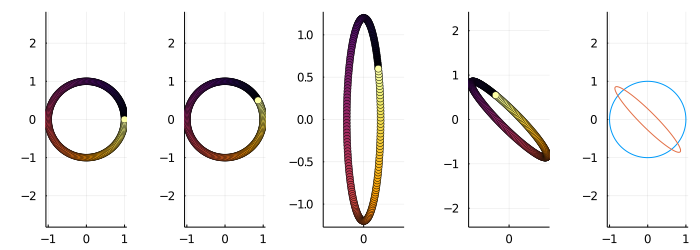

In [2]:
U = [1. -1; 1 1]/sqrt(2)
V = [sqrt(3) 1; -1 sqrt(3)]/2
Σ = [ 0.2 0; 0 1.2]
A = U*Σ*V

# define the unit circle
t = range(0,stop=2π,length=200)
x = [cos.(t) sin.(t)]' 

# apply A = U Σ V' to each point on the circle
x̃ = V'x
ỹ = Σ*x̃
y = U*ỹ

p = plot( x[1,:],x[2,:] )
p = plot!(  y[1,:], y[2,:], aspect_ratio=:equal )
plot(
    scatter(x[1,:],x[2,:], zcolor=t, aspect_ratio=:equal),
    scatter(x̃[1,:],x̃[2,:], zcolor=t, aspect_ratio=:equal),
    scatter(ỹ[1,:],ỹ[2,:], zcolor=t, aspect_ratio=:equal),
    scatter(y[1,:],y[2,:], zcolor=t, aspect_ratio=:equal),
    p, xticks=[-1,0, 1],
    layout=(1,5), legend=:none, colorbar=:none, size=(700,250)
)

# 4. Take Away

Every matrix $A$ of size $M \times N$ has a singular value decomposition (SVD)
* $A = U \Sigma V$, such that
    * $U$ and $V$ are orthogonal matrices
        * $V = \begin{pmatrix} V_r & \tilde{V}_r \end{pmatrix}$
            * the $r$ columns of $V_r$ form an orthonormal basis for $\mathscr{R}(A)$
            * the $N-r$ columns of $\tilde{V}_r$ form an orthonormal basis for $\mathscr{N}(A)$
        * $U = \begin{pmatrix} U_r & \tilde{U}_r \end{pmatrix}$
            * the $r$ columns of $V_r$ form an orthonormal basis for $\mathscr{C}(A)$
            * the $M-r$ columns of $\tilde{V}_r$ form an orthonormal basis for $\mathscr{N}(A^t)$
    * $\Sigma = \begin{pmatrix} \Sigma_r & 0 \\ 0 & 0 \end{pmatrix}$ is a matrix of size $M \times N$ such that<br>
$\quad$ $\Sigma_r$ is an invertible diagonal matrix of size $r \times r$, where $r = rank A$<br><br>
$\quad$ by convention, the diagonal entries of $\Sigma_r$ are in decreasing order: $\sigma_1 \ge \sigma_2 \dots \ge \sigma_r$

<img src="Figs/SVDaction.svg" width=700 style="float:left;border:2px solid black;">